In [1]:
using MLJ, Plots,LinearAlgebra,Statistics,Distributions,Contour,JuMP,Ipopt,StatsBase,Distributions

KDE

In [1]:
function kdenorm(sample,λ)
    D(u)=#Expression
    D(λ,u)=1/λ*D(u/λ)
    K(λ,x,y)=D(λ,x)*D(λ,y)
    kde(λ,x,y,sample)=sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in sample)/length(sample)
    
    scatter(sample,markerstrokewidth=0,markersize=2,label="",color=:DarkRed)
    heatmap!(0:0.1:20,-2:0.1:12,(x,y)->kde(λ,x,y,sample),opacity=0.5,color=cgrad([:white,:MidnightBlue,:Gold]))
end

kdenorm (generic function with 1 method)

In [ ]:
#find best λ
δ=0.001
optimize(λ->sum((r̂(first(λ),x)-r(x))^2 for x in 0:δ:20)*δ,[start point],BFGS())

In [ ]:
D(λ,u)=1/λ*D(u/λ)
f̂(λ,X,x)=mean(D(λ,x-xi) for xi in X)
f̂(λ,X,i,x)=mean(D(λ,x-X[j]) for j in eachindex(X) if j ≠ i) #leave one out

In [ ]:
tricube(x)= abs(x) ≤ 1 ? 70/81*(1-abs(x)^3)^3 : 0
tricube(λ,x)=tricube(x/λ)/λ

RSS for Linear Regression

In [ ]:
X=[ones(length(x)) x]
β̂= X \ y
ŷ=β̂' * X

In [47]:
x = [30, 28, 32, 25, 25, 25, 22, 24, 35, 40]
y = [25, 30, 27, 40, 42, 40, 50, 45, 30, 25];

In [48]:
X=[ones(length(x)) x]
β̂= X \ y

2-element Vector{Float64}:
 74.1151178918169
 -1.3536754507628295

Neural Netwrok

In [49]:
using LinearAlgebra, StatsBase, Test
struct AffineMap
    W::Matrix
    b::Vector
end
struct NeuralNet
    maps::Vector{AffineMap}
    K::Function # activation function
    K̇::Function # derivative of K
end
(A::AffineMap)(x) = A.W * x + A.b
(NN::NeuralNet)(x) = forwardprop(NN,x)[end]
architecture(NN::NeuralNet) = [[size(A.W,2) for A in NN.maps];
                                size(last(NN.maps).W,1)]

architecture (generic function with 1 method)

In [50]:
W₁ = [3.0 -4; -2 4]
W₂ = [1.0 -1]
b₁ = [1.0, -4]
b₂ = [0.0];
K(x) = x > 0 ? x : 0
K̇(x) = x > 0 ? 1 : 0
A1=AffineMap(W₁, b₁)
A2=AffineMap(W₂, b₂)
NN = NeuralNet([A1,A2], K, K̇)

NeuralNet(AffineMap[AffineMap([3.0 -4.0; -2.0 4.0], [1.0, -4.0]), AffineMap([1.0 -1.0], [0.0])], K, K̇)

In [58]:
size(A2.W,2)

2

In [59]:
A2.W

1×2 Matrix{Float64}:
 1.0  -1.0

In [51]:
architecture(NN)

3-element Vector{Int64}:
 2
 2
 1

In [38]:
using SymPy
@vars x y z real=true
p₁ = 1/5
p₂ = 2/5
Σ = [2 1 0
     1 1 0
     0 0 1]
f(μ, Σ, x) = 1/((2π)^2 * sqrt(det(Σ))) * exp(-1/2 * (x-μ)' * inv(Σ) * (x-μ))
f([2,0,1], Σ, [x,y,z]) / f([1,1,-3], Σ, [x,y,z]) |> simplify

                  2.0⋅x - 3.0⋅y + 4.0⋅z
12.1824939607035⋅ℯ                     

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/hzr/.julia/packages/MLJModels/4sRmw/src/loading.jl:168


import MLJScikitLearnInterface ✔


┌ Info: Training Machine{SVMClassifier,…}.
└ @ MLJBase /Users/hzr/.julia/packages/MLJBase/u6vLz/src/machines.jl:403


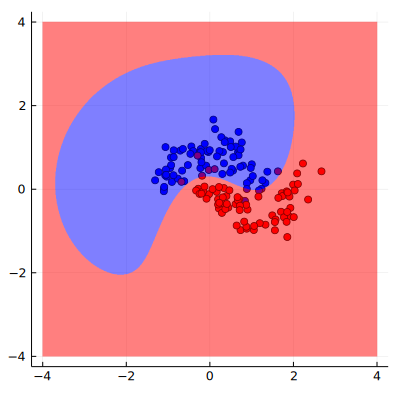

In [39]:
using MLJ, Plots
using Random; Random.seed!(123)
X, y = make_moons(noise = 1/4)
scatter(X.x1, X.x2, group = y, color = [:blue :red], label = "")
SVM = @load SVMClassifier 
model = SVM(kernel = "rbf")
svm = machine(model, X, y)
fit!(svm)
fitted_params(svm)
param_list = fitted_params(svm)
# First, we define the Gaussian RBF as our kernel function
rbf_kernel(a,b;γ=0.5) = exp(-γ*sum((a-b).^2)) 

# Note the 4th element stores hadamard product between y and η, we make it a col vector
η_hdm_y = permutedims(fitted_params(svm)[4])
# Then get α the intercept
α = fitted_params(svm)[6]
# get indices with support vectors
support = fitted_params(svm)[1];
# use support vectors to create a feature matrix
features = hcat([X.x1[i+1] for i in support],[X.x2[i+1] for i in support]);

# the prediction function is essentially the a hyperplane with kernel
# We get the prediction function from data Gymnasia
function predict(feature_matrix, η_hdm_y, α, test) 
    𝒦test = permutedims([rbf_kernel(permutedims(row),test) for row in eachrow(feature_matrix)])
    (𝒦test * η_hdm_y .+ α)[1]
end

heatmap!(-4:0.01:4, -4:0.01:4, (x,y) -> sign((predict(features, η_hdm_y, α, [x y]))), fillopacity = 0.5, colorbar = false, fontfamily = "Palatino", fillcolor = cgrad([:blue, :lightblue, :pink, :red]), aspect_ratio= 1, size = (400, 400))

In [45]:
sign(-4)

-1

In [60]:
using Distributions

In [75]:
x=[rand(Uniform(0,2)) for _ in 1:100]
y=[rand(Uniform(0,2)) for _ in 1:100]
xs=[rand(Uniform(0,2)) for _ in 1:100]
ys=[rand(Uniform(0,2)) for _ in 1:100];

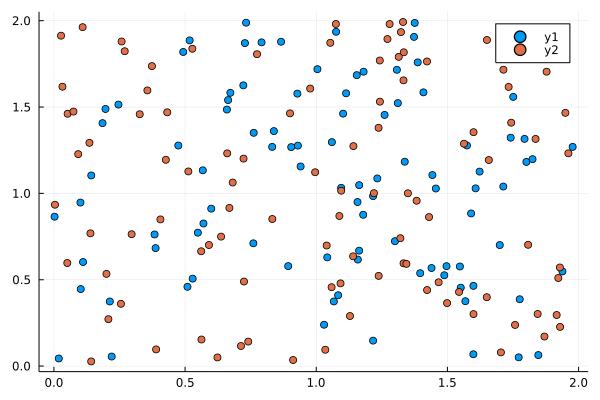

In [76]:
scatter(x,y)
scatter!(xs,ys)